# Análise do Mercado de Games PS4

## Introdução

Este relatório apresenta uma análise exploratória do mercado de jogos para a plataforma **PlayStation 4 (PS4)**.  
Os dados utilizados permitem investigar tendências de vendas globais, distribuição por gênero, produtores, regiões e outros fatores relevantes.

A análise foi elaborada como parte do treinamento **"Python para Análise de Dados"**,  
realizado na plataforma **Udemy** pelo instrutor **Odemir Depieri Jr**.

---

## Autor

**João Victor**

---

## Dataset

O conjunto de dados utilizado nesta análise foi obtido no Kaggle:

📌 **Video Games Sales Dataset**  
🔗 https://www.kaggle.com/datasets/sidtwr/videogames-sales-dataset  

O dataset contém informações sobre vendas de videogames, incluindo plataforma, editor, gênero, região e valores de vendas.

---

In [63]:
 # Libs necessárias

# Libs para modelagem e matrizes
import numpy as np
import pandas as pd

# Libs para análises gráficas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# lib para ignorar avisos
import warnings

# desabilitando avisos
warnings.filterwarnings('ignore')

In [64]:
# Lendo os dados
base_dados = pd.read_csv('PS4_GamesSales.csv', encoding='latin-1')

# verificando
base_dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [65]:
# Dimensão da base de dados
base_dados.shape

(1034, 9)

In [66]:
    base_dados.columns

Index(['Game', 'Year', 'Genre', 'Publisher', 'North America', 'Europe',
       'Japan', 'Rest of World', 'Global'],
      dtype='object')

In [67]:
# ver campos nulos
base_dados.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

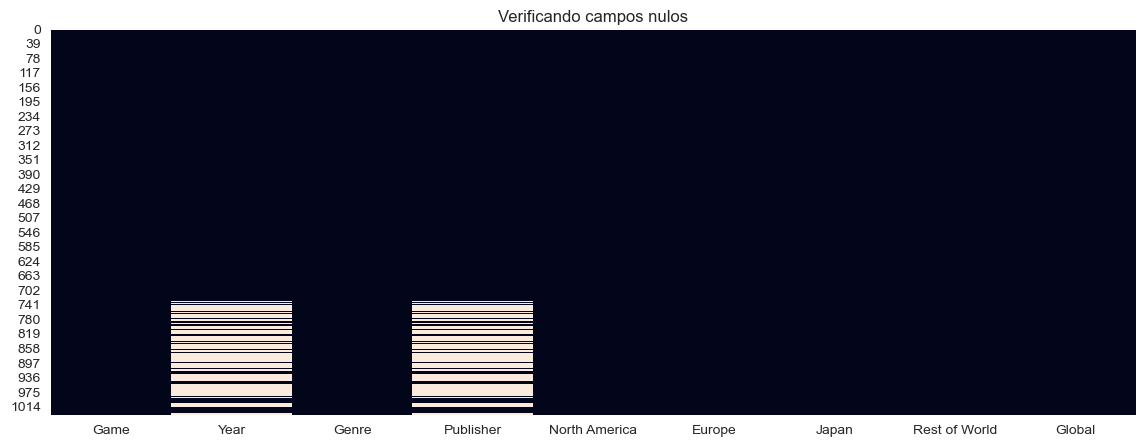

In [68]:
# nulos graficos
plt.figure(figsize=(14,5))
plt.title('Verificando campos nulos')
sns.heatmap(base_dados.isnull(), cbar=False);

In [69]:
# REMOVER CAMPOS NULOS DE UM DATASET

base_dados.dropna(inplace=True)

In [70]:
# ESTATISTICAS
base_dados.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


ANÁLISES GRAFICAS

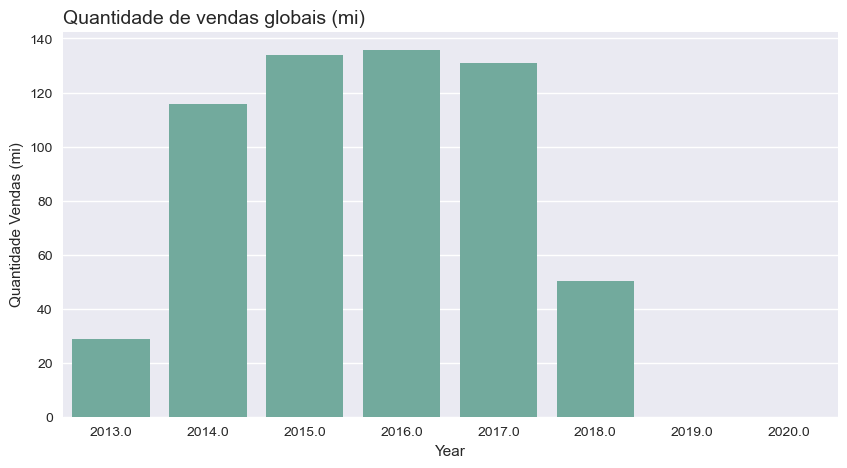

In [71]:
plt.figure(figsize=(10,5)) # tamanho da imagem
plt.title('Quantidade de vendas globais (mi)', loc='left', fontsize=14) # título
plt.ylabel('Quantidade Vendas (mi)') # gráfico
sns.barplot(data=base_dados, x='Year', y='Global', ci=None, color='#69b3a2', estimator=sum); # label

In [72]:
# Retirar os anos
base_dados = base_dados.loc[(base_dados['Year'] !=2019) & (base_dados['Year'] !=2020)]  #['Year'].unique()
#  ['Year'].unique() -> verifica se removeu os anos 2019 e 2020
#verificar dados
base_dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


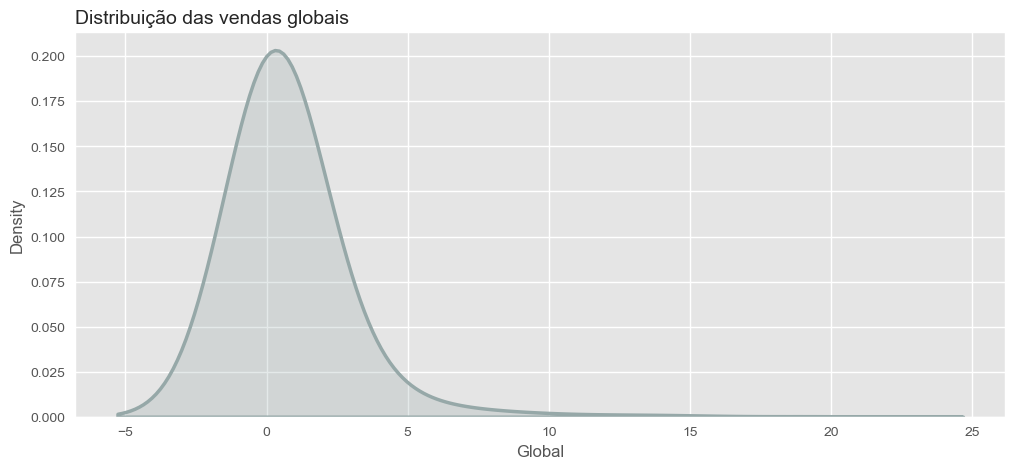

In [73]:
# Tamanho
plt.figure(figsize=(12,5))
# Estilo
plt.style.use('ggplot')
# titulo
plt.title('Distribuição das vendas globais',loc='left', fontsize=14)
# Grafico de densidade  / concentração de vendas
sns.kdeplot(base_dados['Global'], shade=True, bw=1, color='#96a8a8', linewidth=2.5 ); 

In [74]:
base_dados.groupby(by=['Year']).sum()

,Game,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
Year,,,,,,,,
2013.0,Call of Duty: GhostsBattlefield 4FIFA Soccer 1...,ShooterShooterSportsAction-AdventureShooterRac...,ActivisionElectronic ArtsEA SportsUbisoftSony ...,10.35,12.88,0.97,4.57,28.76
2014.0,Grand Theft Auto VCall of Duty: Advanced Warfa...,ActionShooterAction-AdventureMiscSportsShooter...,Rockstar GamesActivisionSony Computer Entertai...,39.80,54.12,3.58,18.29,115.85
2015.0,Call of Duty: Black Ops 3Fallout 4FIFA 16Star ...,ShooterRole-PlayingSportsShooterActionRole-Pla...,ActivisionBethesda SoftworksEA SportsElectroni...,49.60,56.21,7.28,20.88,133.99
2016.0,FIFA 17Uncharted (PS4)Call of Duty: Infinite W...,SportsActionShooterShooterRole-PlayingShooterS...,Electronic ArtsSony Interactive EntertainmentA...,47.40,57.98,9.65,20.71,135.72
2017.0,Call of Duty: WWIIFIFA 18Horizon: Zero DawnCra...,ShooterSportsActionPlatformShooterShooterActio...,ActivisionEA SportsSony Interactive Entertainm...,44.77,57.18,9.08,19.89,130.90
2018.0,Red Dead Redemption 2Spider-Man (PS4)God of Wa...,Action-AdventureAction-AdventureActionActionAc...,Rockstar GamesSony Interactive EntertainmentSo...,19.65,18.70,4.13,7.69,50.20


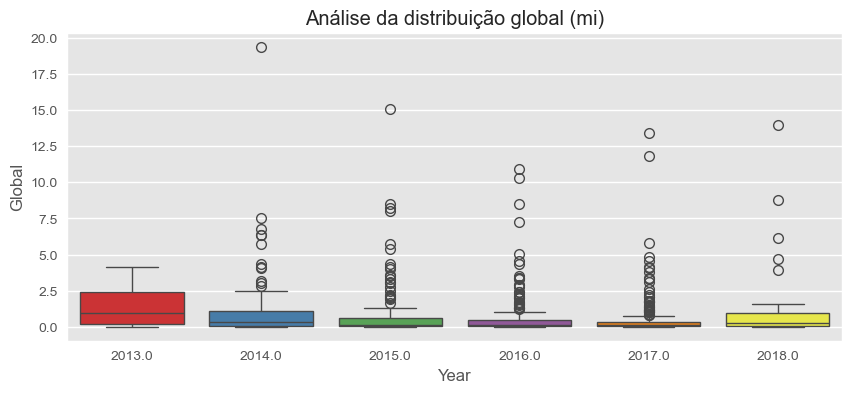

In [75]:
# Tamanho
plt.figure(figsize=(10,4))
# titulo
plt.title('Análise da distribuição global (mi)')
sns.boxplot(data=base_dados, x='Year', y='Global', palette='Set1');

In [76]:
# ter certeza do outlier de 2014 a venda de 20 mi
base_dados.loc[base_dados['Global'] >= 10]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


In [77]:
base_dados

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
1024,Biomutant,2018.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1026,de Blob,2017.0,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1027,Chaos on Deponia,2017.0,Adventure,Daedalic Entertainment,0.00,0.00,0.00,0.00,0.00
1028,Code Vein,2018.0,Action,Bandai Namco Entertainment,0.00,0.00,0.00,0.00,0.00


In [78]:
# analisando a proporção dos 100¢ de cada continente comparado ao total
Analise = base_dados.groupby( by=['Year'] ).sum().reset_index()
America =  [ America / Total * 100 for America, Total in zip(Analise['North America'], Analise['Global'])]
Europa =  [ Europa / Total * 100 for Europa, Total in zip(Analise['Europe'], Analise['Global'])]
Japao = [ Japao / Total * 100 for Japao, Total in zip(Analise['Japan'], Analise['Global'])]
Mundo = [ Mundo / Total * 100 for Mundo, Total in zip(Analise['Rest of World'], Analise['Global'])]
America, Europa, Japao, Mundo


([35.9874826147427,
  34.35476909797151,
  37.01768788715576,
  34.92484526967286,
  34.20168067226891,
  39.14342629482071],
 [44.78442280945759,
  46.71558049201555,
  41.95089185760131,
  42.72030651340996,
  43.68220015278838,
  37.25099601593625],
 [3.372739916550765,
  3.0902028485110056,
  5.433241286663184,
  7.110226937813145,
  6.936592818945759,
  8.227091633466136],
 [15.890125173852576,
  15.78765645230902,
  15.58325248152847,
  15.259357500736812,
  15.194805194805195,
  15.31872509960159])

In [79]:
Analise

,Year,Game,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,2013.0,Call of Duty: GhostsBattlefield 4FIFA Soccer 1...,ShooterShooterSportsAction-AdventureShooterRac...,ActivisionElectronic ArtsEA SportsUbisoftSony ...,10.35,12.88,0.97,4.57,28.76
1,2014.0,Grand Theft Auto VCall of Duty: Advanced Warfa...,ActionShooterAction-AdventureMiscSportsShooter...,Rockstar GamesActivisionSony Computer Entertai...,39.80,54.12,3.58,18.29,115.85
2,2015.0,Call of Duty: Black Ops 3Fallout 4FIFA 16Star ...,ShooterRole-PlayingSportsShooterActionRole-Pla...,ActivisionBethesda SoftworksEA SportsElectroni...,49.60,56.21,7.28,20.88,133.99
3,2016.0,FIFA 17Uncharted (PS4)Call of Duty: Infinite W...,SportsActionShooterShooterRole-PlayingShooterS...,Electronic ArtsSony Interactive EntertainmentA...,47.40,57.98,9.65,20.71,135.72
4,2017.0,Call of Duty: WWIIFIFA 18Horizon: Zero DawnCra...,ShooterSportsActionPlatformShooterShooterActio...,ActivisionEA SportsSony Interactive Entertainm...,44.77,57.18,9.08,19.89,130.90
5,2018.0,Red Dead Redemption 2Spider-Man (PS4)God of Wa...,Action-AdventureAction-AdventureActionActionAc...,Rockstar GamesSony Interactive EntertainmentSo...,19.65,18.70,4.13,7.69,50.20


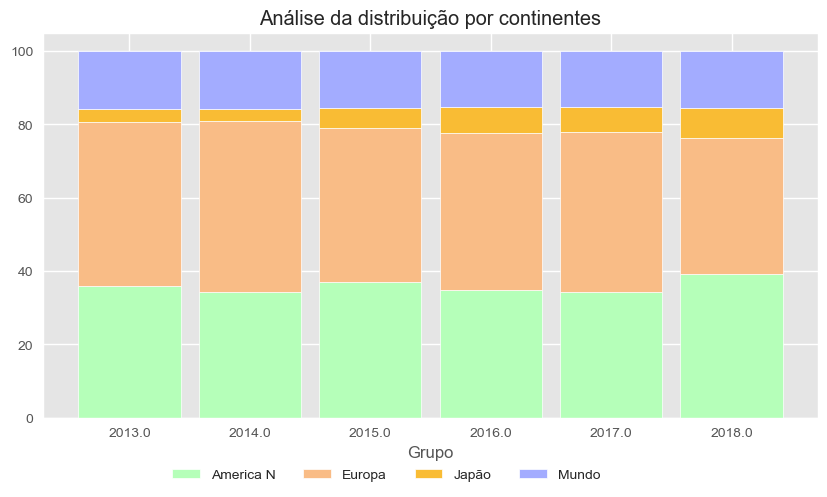

In [80]:
# Tamanho
plt.figure(figsize=(10,5))
# Largura barra no gráfico
Largura_Barra =0.85
Rotulos = Analise['Year']
Grupos = [0,1,2,3,4,5]
#---------------------------------------------------------------------------------
# titulo
plt.title('Análise da distribuição por continentes')

# Plot América
plt.bar(Grupos, America, width=Largura_Barra, color= '#b5ffb9', edgecolor='white')
# Plot Europa
plt.bar(Grupos, Europa, bottom=America, width=Largura_Barra, color= '#f9bc86', edgecolor='white')
# Plot Japao
plt.bar(Grupos, Japao, bottom=[A+B for A,B in zip(America, Europa)], width=Largura_Barra, color= '#f9bc34', edgecolor='white')
# Plot Resto do Mundo
plt.bar(Grupos, Mundo, bottom=[A+B+C for A,B,C in zip(America, Europa, Japao)], width=Largura_Barra, color= '#a3acff', edgecolor='white')
#--------------------------------------------------------------------------------------
#Labels
plt.xticks(Grupos, Rotulos)
plt.xlabel('Grupo')

# Legenda
plt.legend(['America N', 'Europa', 'Japão', 'Mundo'], loc='upper left', bbox_to_anchor=(0.15, -0.1), ncol=4);


In [81]:
base_dados['Publisher'].unique()

array(['Rockstar Games', 'Activision', 'EA Sports', 'Electronic Arts',
       'Sony Interactive Entertainment', 'Bethesda Softworks',
       'Sony Computer Entertainment', 'Namco Bandai Games', 'Square Enix',
       'Capcom', 'Blizzard Entertainment', 'Ubisoft',
       'Warner Bros. Interactive', '2K Sports',
       'Warner Bros. Interactive Entertainment',
       'Konami Digital Entertainment', '2K Games', 'Hello Games',
       '505 Games', 'Deep Silver', 'Take-Two Interactive',
       'Bandai Namco Games', 'Sega', 'Tecmo Koei', 'Gearbox Software',
       'Mojang', 'Disney Interactive Studios', 'Focus Home Interactive',
       'Studio Wildcard', 'Codemasters', 'Koch Media',
       'Harmonix Music Systems', 'Rebellion Developments', 'Gun Media',
       'Telltale Games', 'Kalypso Media', 'City Interactive',
       'NIS America', 'Sold Out', 'Tripwire Interactive', 'PQube',
       'THQ Nordic', 'Milestone S.r.l.', 'Nordic Games', 'Astragon',
       'Koei Tecmo', 'Frontier Developments', 

Acima temos muita informação que em um gráfico o deixaria muito poluído. A solução seria converter estes valores de texto em valores numéricos

In [82]:
# convertendo as informações em valor numerico
from sklearn.preprocessing import LabelEncoder
funcao_label = LabelEncoder()

base_dados['Produtor'] = funcao_label.fit_transform(base_dados['Publisher'])
base_dados['Genero'] = funcao_label.fit_transform(base_dados['Genre'])
base_dados['Jogo'] = funcao_label.fit_transform(base_dados['Game'])
base_dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,222


In [83]:
# escolher paleta de cores
paleta_cores = sns.color_palette('husl',8)
paleta_cores

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)]

<Axes: title={'center': 'Análise dos produtores de Game (mi)'}, xlabel='Produtor', ylabel='Global'>

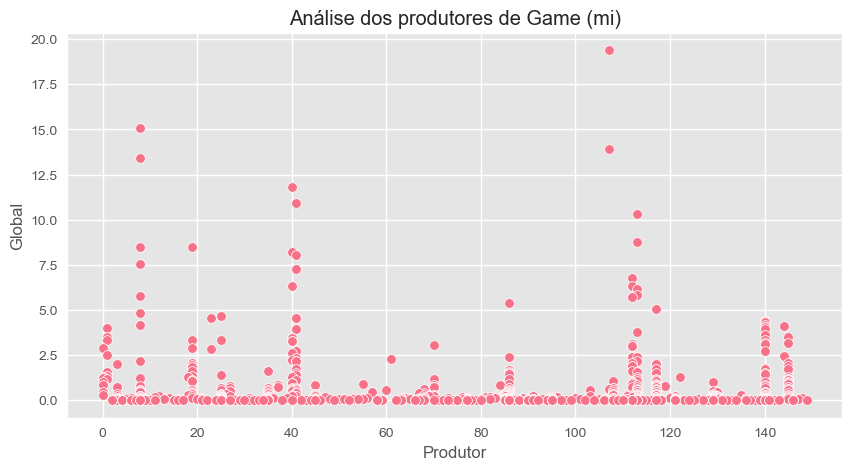

In [84]:
plt.figure(figsize=(10,5))
plt.title('Análise dos produtores de Game (mi)')
sns.scatterplot(data=base_dados, x='Produtor', y='Global', color=paleta_cores[0])

<Axes: title={'center': 'Análise dos gêneros de Game (mi)'}, xlabel='Genero', ylabel='Global'>

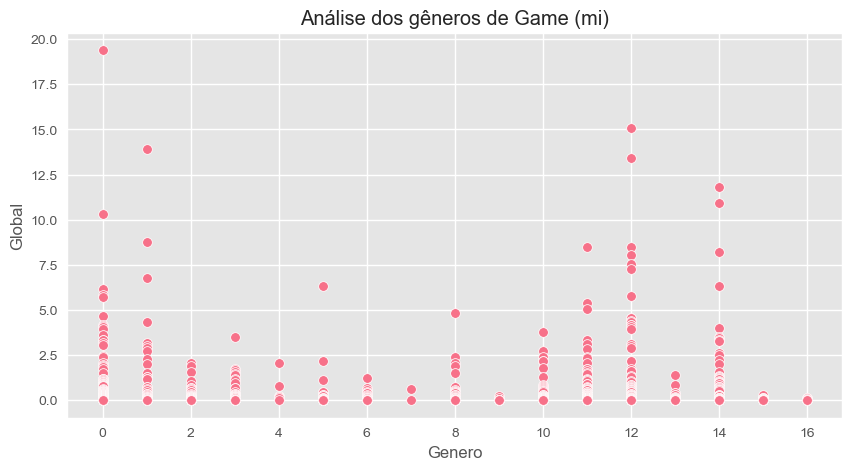

In [85]:
plt.figure(figsize=(10,5))
plt.title('Análise dos gêneros de Game (mi)')
sns.scatterplot(data=base_dados, x='Genero', y='Global', color=paleta_cores[0])

<Axes: title={'center': 'Análise dos games de Game (mi)'}, xlabel='Jogo', ylabel='Global'>

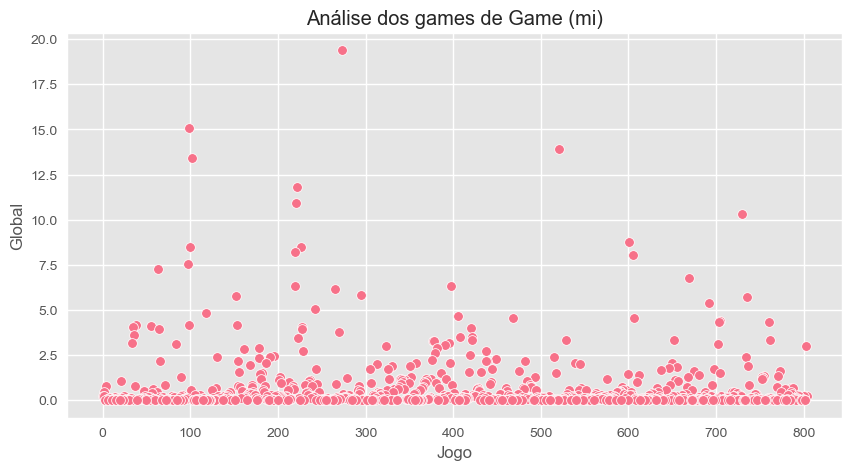

In [86]:
plt.figure(figsize=(10,5))
plt.title('Análise dos games de Game (mi)')
sns.scatterplot(data=base_dados, x='Jogo', y='Global', color=paleta_cores[0])

## Relatório Final

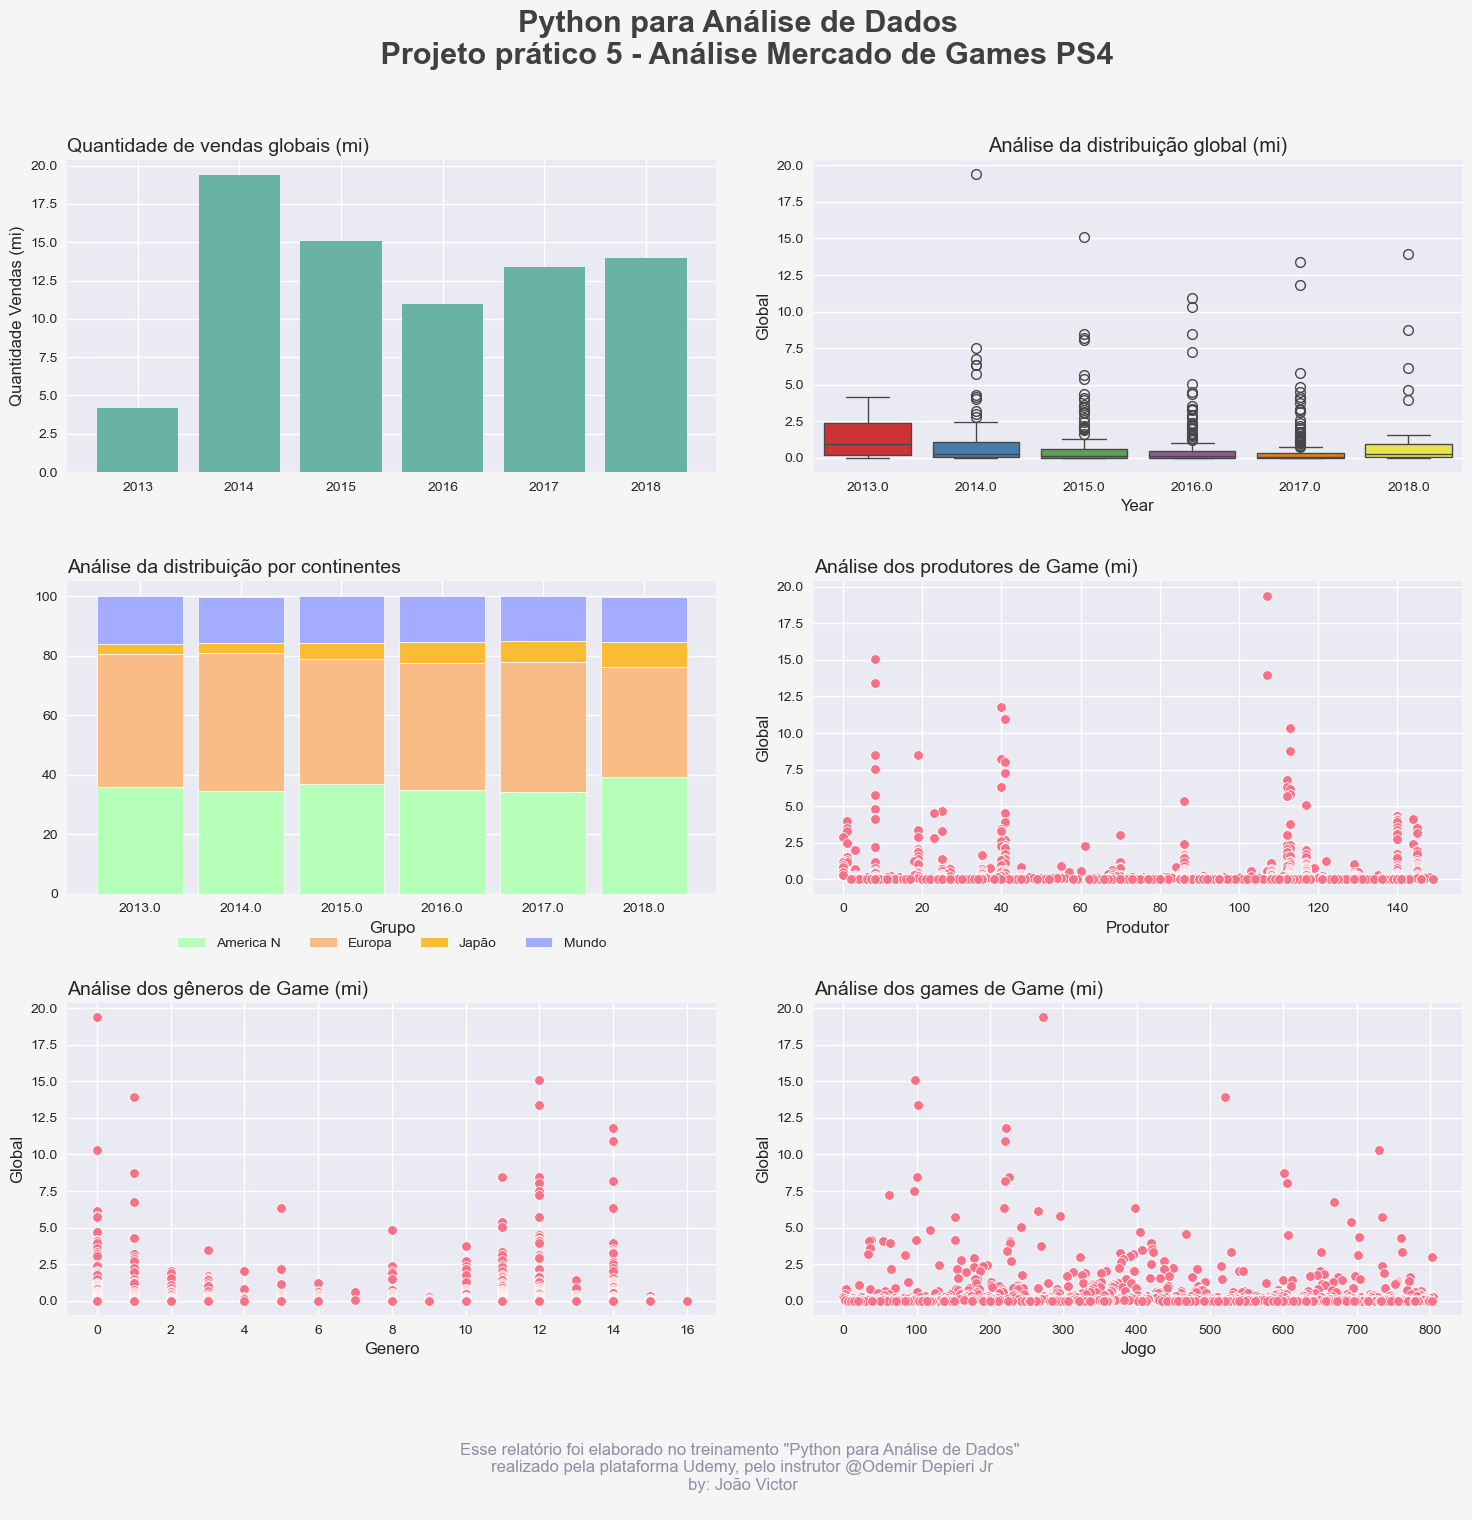

In [87]:
# Tamanho da imagem
fig, ax = plt.subplots(figsize=(18,15))
fig.delaxes(ax)  # remove o primeiro eixo criado automaticamente

# Cor de fundo
cor_fundo = '#f5f5f5'
ax.set_facecolor(cor_fundo)
fig.set_facecolor(cor_fundo)

# Estilo dos graficos
plt.style.use('seaborn-v0_8-darkgrid')
# Titulo da figura
plt.suptitle('Python para Análise de Dados \n Projeto prático 5 - Análise Mercado de Games PS4', fontsize=22, color='#404040', fontweight=600)

# Parâmetros para oo grid
linhas =3
colunas = 2

#Acessando Grafico 1
plt.subplot (linhas, colunas, 1)
plt.title('Quantidade de vendas globais (mi)', loc='left', fontsize=14) # título
plt.ylabel('Quantidade Vendas (mi)') # gráfico
plt.bar(base_dados ['Year'], base_dados['Global'], color='#69b3a2') # label

#----------------------------------------
#Acessando Grafico 2
plt.subplot (linhas, colunas, 2)
# titulo
plt.title('Análise da distribuição global (mi)')
sns.boxplot(data=base_dados, x='Year', y='Global', palette='Set1')
#---------------------------------------
#Acessando Grafico 3
plt.subplot (linhas, colunas, 3)
# Largura barra no gráfico
Largura_Barra =0.85
Rotulos = Analise['Year']
Grupos = [0,1,2,3,4,5]
#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
# titulo
plt.title('Análise da distribuição por continentes',loc='left', fontsize=14)
# Plot América
plt.bar(Grupos, America, width=Largura_Barra, color= '#b5ffb9', edgecolor='white')
# Plot Europa
plt.bar(Grupos, Europa, bottom=America, width=Largura_Barra, color= '#f9bc86', edgecolor='white')
# Plot Japao
plt.bar(Grupos, Japao, bottom=[A+B for A,B in zip(America, Europa)], width=Largura_Barra, color= '#f9bc34', edgecolor='white')
# Plot Resto do Mundo
plt.bar(Grupos, Mundo, bottom=[A+B+C for A,B,C in zip(America, Europa, Japao)], width=Largura_Barra, color= '#a3acff', edgecolor='white')
#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
#Labels
plt.xticks(Grupos, Rotulos)
plt.xlabel('Grupo')
# Legenda
plt.legend(['America N', 'Europa', 'Japão', 'Mundo'], loc='upper left', bbox_to_anchor=(0.15, -0.1), ncol=4)

#---------------------------------------
#Acessando Grafico 4
plt.subplot (linhas, colunas, 4)
plt.title('Análise dos produtores de Game (mi)',loc='left', fontsize=14)

sns.scatterplot(data=base_dados, x='Produtor', y='Global', color=paleta_cores[0])
#---------------------------------------
#Acessando Grafico 5
plt.subplot (linhas, colunas, 5)
plt.title('Análise dos gêneros de Game (mi)',loc='left', fontsize=14)
sns.scatterplot(data=base_dados, x='Genero', y='Global', color=paleta_cores[0])
#--------------------------------------
#Acessando Grafico 6
plt.subplot (linhas, colunas, 6)
plt.title('Análise dos games de Game (mi)',loc='left', fontsize=14)
sns.scatterplot(data=base_dados, x='Jogo', y='Global', color=paleta_cores[0])

# Ajustar layout
plt.subplots_adjust(hspace=0.35, wspace=0.15)

# Rodapé
rodape = '''
Esse relatório foi elaborado no treinamento "Python para Análise de Dados" 
realizado pela plataforma Udemy, pelo instrutor @Odemir Depieri Jr
by: João Victor
'''

# Incluindo rodapé no relatório
fig.text(0.5, -0.02, rodape, ha='center', va='bottom', size=12, color='#938ca1')


# BAIXAR RELATORIO
plt.savefig("relatorio_completo.png", dpi=300, bbox_inches="tight")
plt.savefig("relatorio_completo.pdf", dpi=300, bbox_inches="tight")
